# Opencv Intro
****************************
## Installation of OpenCV 
https://docs.opencv.org/4.x/d7/d9f/tutorial_linux_install.html
https://pypi.org/project/opencv-python/

In [5]:
! pip3 install opencv-python opencv-contrib-python

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Loading an image

In [34]:
# Set the data we're interested to load
img_dset = {
    "rgb_img":'data/intro/rgb_img.jpg',
    "gray_img":'data/intro/gray_img.png',
    "depth_img":'data/intro/depth_img.png'
    }

In [35]:
help(cv2.imread)

Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

In [36]:
# Reading an RGB image:
img_rgb = cv2.imread(img_dset['rgb_img'],1)

# Reading Grayscale image:
img_gray = cv2.imread(img_dset['gray_img'],0)

# Reading Depth image:
img_depth = cv2.imread(img_dset['depth_img'],2)


****************************
## Visiualize the image

In [37]:
help(cv2.imshow)

Help on built-in function imshow:

imshow(...)
    imshow(winname, mat) -> None
    .   @brief Displays an image in the specified window.
    .   
    .   The function imshow displays an image in the specified window. If the window was created with the
    .   cv::WINDOW_AUTOSIZE flag, the image is shown with its original size, however it is still limited by the screen resolution.
    .   Otherwise, the image is scaled to fit the window. The function may scale the image, depending on its depth:
    .   
    .   -   If the image is 8-bit unsigned, it is displayed as is.
    .   -   If the image is 16-bit unsigned, the pixels are divided by 256. That is, the
    .       value range [0,255\*256] is mapped to [0,255].
    .   -   If the image is 32-bit or 64-bit floating-point, the pixel values are multiplied by 255. That is, the
    .       value range [0,1] is mapped to [0,255].
    .   -   32-bit integer images are not processed anymore due to ambiguouty of required transform.
    .    

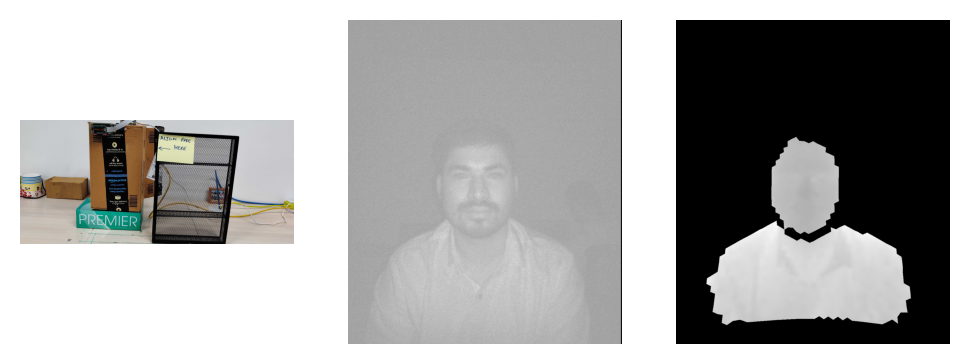

In [40]:
'''
cv2.imshow("RGB image",img_rgb)
cv2.waitKey(0)
'''
plt.figure(figsize=(6,4),dpi=200)

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_depth,cmap='gray')
plt.axis('off')

plt.show()

By default rgb images are loaded in BGR format by opencv.
But matplotlib understands images as RGB format, hence we need to convert the image to RGB in order to get the correct color

In [39]:
#convert color from bgr to rgb
img_rgb = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2RGB)

************************
## Basic operations on image

### Find the dimensions of images


In [27]:
# (#rows,#cols,#chan)
img_rgb.shape

(1280, 1080)

In [18]:
img_gray.shape

(1280, 1080)

In [19]:
img_depth.shape

(1280, 1080)

### Access and manipulate the image


In [20]:
img_rgb[100,100,0]

166

In [24]:
img_rgb[100,100]

array([255, 166, 166], dtype=uint8)

In [26]:
img_depth[500,500]

542

In [42]:
img_rgb[100:150,:,0]=255

(-0.5, 3999.5, 1823.5, -0.5)

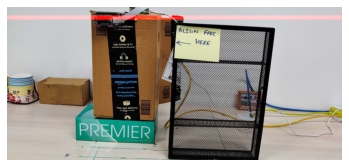

In [43]:
plt.imshow(img_rgb)
plt.axis('off')

## Writing images into local storage

In [28]:
help(cv2.imwrite)

Help on built-in function imwrite:

imwrite(...)
    imwrite(filename, img[, params]) -> retval
    .   @brief Saves an image to a specified file.
    .   
    .   The function imwrite saves the image to the specified file. The image format is chosen based on the
    .   filename extension (see cv::imread for the list of extensions). In general, only 8-bit
    .   single-channel or 3-channel (with 'BGR' channel order) images
    .   can be saved using this function, with these exceptions:
    .   
    .   - 16-bit unsigned (CV_16U) images can be saved in the case of PNG, JPEG 2000, and TIFF formats
    .   - 32-bit float (CV_32F) images can be saved in PFM, TIFF, OpenEXR, and Radiance HDR formats;
    .     3-channel (CV_32FC3) TIFF images will be saved using the LogLuv high dynamic range encoding
    .     (4 bytes per pixel)
    .   - PNG images with an alpha channel can be saved using this function. To do this, create
    .   8-bit (or 16-bit) 4-channel image BGRA, where the alpha c

In [ ]:
cv2.imwrite("trial_rgb.png",img_rgb)